In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import Preprocessing
from circle import circleDrawing, distance_list
import SepFilter as sp
import pandas as pd

width = 320
height = 240

In [2]:
img = cv2.imread('Coconuts\coconut.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:

# dim = (width, height)
# new_img = cv2.resize(img, dim)
#cv2.imshow('graycsale image',img)
#plt.imshow(new_img, cmap = 'gray')

In [4]:
img1 = Preprocessing.preprocessing(img)

# plt.imshow(img1, cmap = 'gray')

Current Width:  539
Current Height:  408
320 242


In [5]:
# img2 = sp.sepFil(img1,)

(240, 320)


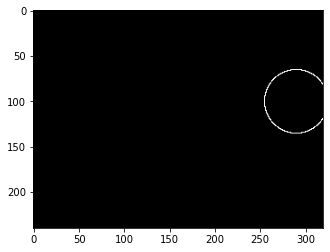

In [6]:
img_blank = np.zeros( img1.shape) 
print(img_blank.shape)
a_test = circleDrawing(290, 100, 35, width, height)
a_test = a_test + img_blank
plt.imshow(a_test, cmap='gray')

In [36]:
rr = 30
x0 = 100
y0 = 15
dist = distance_list(height, width, x0, y0)

for i in range(0, width):
    for j in range(0, height):
        if a_test[j, i]>0:
            img_blank = img_blank + circleDrawing(  i, j, rr, width, height)     

In [37]:
# # window_i,j are inputs (top left of the window)
# for i in range(window_i, min(window_i+rr, width)):

#     for j in range(window_j, min(window_j+rr, height)):

#         if a_test[j, i]>0:
#             img_blank = img_blank + circleDrawing(  i, j, rr, width, height, dist)     

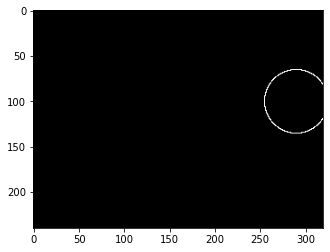

In [38]:
plt.imshow(a_test,cmap='gray')

array([[ 20.,  15.,  16.,  15.,  14.,  13.,  13.,  14.,  12.,  11.,  11.,
         12.,  13.,  14.,  13.,  11.,  11.,  11.,  12.,   0.],
       [ 21.,  18.,  17.,  16.,  15.,  16.,  16.,  14.,  13.,  13.,  13.,
         15.,  13.,  13.,  13.,  11.,  11.,  12.,   0.,   0.],
       [ 26.,  23.,  19.,  18.,  19.,  18.,  15.,  15.,  14.,  15.,  15.,
         15.,  14.,  14.,  13.,  14.,  15.,  15.,  13.,  16.],
       [ 29.,  28.,  22.,  22.,  21.,  17.,  17.,  17.,  18.,  16.,  16.,
         16.,  17.,  16.,  16.,  18.,  17.,  16.,  16.,  16.],
       [ 34.,  38.,  32.,  25.,  23.,  21.,  20.,  18.,  20.,  19.,  19.,
         21.,  19.,  18.,  20.,  19.,  16.,  15.,  15.,  13.],
       [ 52.,  53.,  44.,  32.,  24.,  20.,  20.,  22.,  23.,  21.,  23.,
         22.,  21.,  20.,  18.,  16.,  15.,  16.,  16.,  15.],
       [ 62.,  66.,  65.,  48.,  28.,  25.,  25.,  27.,  25.,  25.,  23.,
         22.,  22.,  20.,  21.,  21.,  19.,  18.,  16.,  16.],
       [ 41.,  36.,  44.,  54.,  44.,  36

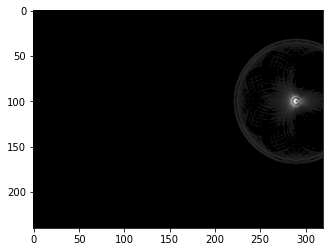

In [39]:
pd_img = pd.DataFrame(img_blank)
new_img = pd_img[pd_img>10].fillna(0)
new_img = pd.DataFrame.to_numpy(new_img)
plt.imshow(new_img, cmap='gray')
# cv2.imwrite("circled.png",new_img)
new_img[89:110,290:310]


In [40]:
def largest_indices(ary, n):
    """Returns the n largest indices from a numpy array."""
    flat = ary.flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    return np.unravel_index(indices, ary.shape)

In [43]:
np.max(new_img)


129.0

In [46]:
img_blank_larg_ind = largest_indices(img_blank, int(rr/4)) ###################### maybe change 2 * rr
mean_x = int(img_blank_larg_ind[1].sum()/rr)
mean_y = int(img_blank_larg_ind[0].sum()/rr)
img_blank_larg_val = np.mean(img_blank[img_blank_larg_ind])


In [47]:
img_blank_larg_val

119.28571428571429